In [1]:
import os
print(os.getcwd())

import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm, CenteredNorm
import seaborn as sns
import pandas as pd
import numpy as np


def width_changer(axi, new_value):
    for patch in axi.patches :
        cur_width = patch.get_width()
        diff = cur_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)


/Users/ruimeng/project/search/uir_best_cc/notebook/augtriever


### Plot BEIR/QA together (wiki w/o RC)

52
Index(['group', 'aug', 'arch', 'short-exp-name', 'exp-name', 'metric',
       'msmarco', 'trec-covid', 'bioasq', 'nfcorpus',
       ...
       'Unnamed: 91', 'Unnamed: 92', 'Unnamed: 93', 'Unnamed: 94',
       'Unnamed: 95', 'Unnamed: 96', 'Unnamed: 97', 'Unnamed: 98',
       'Unnamed: 99', 'Unnamed: 100'],
      dtype='object', length=101)


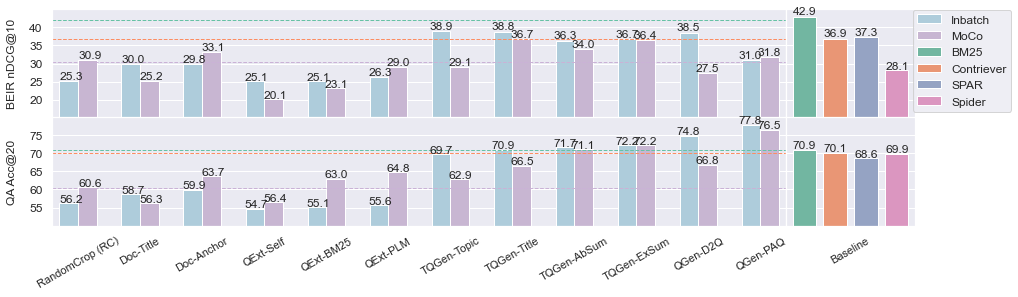

In [10]:
beir_df = pd.read_csv('beir_score.csv')
# print(df.to_string())
df = beir_df[~beir_df['group'].isnull()]
print(len(df))
print(df.columns)

# sns.color_palette("Set2")
# sns.color_palette("Paired")
hls_colors = sns.color_palette("hls", 8)
husl_colors = sns.color_palette("husl", 8)
paired_colors = sns.color_palette("Paired").as_hex()
set_colors = sns.color_palette("Set2").as_hex()

sns.set(rc={'figure.figsize': (10, 8), 'axes.labelsize': 12, 'ytick.labelsize': 12, 'axes.labelpad': 12, 'legend.fontsize': 12})
fig, axes = plt.subplots(2, 2, figsize=(12, 6), width_ratios=[4, 0.7])

# ============
# BEIR
# ============
our_ax = axes[0][0]
baseline_ax = axes[0][1]
# plot baselines
df_baseline = df[df['group'] == 'Baseline']
our_plot = sns.barplot(x='aug', y="Avg-14 (public)", hue="arch", data=df_baseline, ax=baseline_ax, palette=set_colors)
# plot ours
df_noRC = df[(~df['aug'].str.endswith('+RC')) & (df['group'].str.strip() != 'Baseline')]
baseline_plot = sns.barplot(x='aug', y="Avg-14 (public)", hue="arch", data=df_noRC, ax=our_ax, palette=[paired_colors[0], paired_colors[8]], width=0.6)

# adjust bar width and margin
width_changer(our_ax, .3)
width_changer(baseline_ax, .15)
our_ax.margins(x=0.01)  # left/right margin to border
baseline_ax.margins(x=0.02)  # left/right margin to border

# axes[0].set_xlim(0, 3)
# axes[1].set_xlim(0, 3)

our_plot.set(xticklabels=[])
our_plot.set(xlabel=None)
baseline_plot.set(xticklabels=[])
baseline_plot.set(xlabel=None)

# plt.setp(axes[0].get_xticklabels(), rotation=45, ha='center')
# plt.setp(axes[1].get_xticklabels(), rotation=45, ha='center')

# add labels
for p in our_ax.patches:
    our_ax.annotate('%.1f' % (p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.015))
for p in baseline_ax.patches:
    baseline_ax.annotate('%.1f' % (p.get_height()), (p.get_x() * 1.004, p.get_height() * 1.015), size=12)

our_ax.set(ylim=(15, 45))
baseline_ax.set(ylim=(15, 45))
our_ax.set_yticks(np.arange(20, 45, 5))
baseline_ax.set_yticks(np.arange(20, 45, 5))

our_ax.set_ylabel("BEIR nDCG@10")
our_ax.set_xlabel("")
baseline_ax.set_xlabel("")
baseline_ax.set_ylabel("")
baseline_ax.set(ylabel=None)
baseline_ax.set(yticklabels=[])

our_ax.axhline(y=42.0, c=set_colors[0], linestyle='dashed', label="BM25", linewidth=1)
our_ax.axhline(y=36.9, c=set_colors[1], linestyle='dashed', label="Contriever", linewidth=1)
our_ax.axhline(y=30.5, c=paired_colors[8], linestyle='dashed', label="Our Contriever", linewidth=1)
our_ax.legend([],[], frameon=False)
baseline_ax.legend([],[], frameon=False)
# ============
# QA
# ============
qa_df = pd.read_csv('qa_score.csv')
df = qa_df[~qa_df['group'].isnull()]

our_ax = axes[1][0]
baseline_ax = axes[1][1]
# plot baselines
df_baseline = df[df['group'] == 'Baseline']
plot = sns.barplot(x='aug', y="AVG-R@20", hue="arch", data=df_baseline, ax=baseline_ax, palette=set_colors)
# # plot ours
df_noRC = df[(~df['short-exp-name'].str.endswith('+RC')) & (df['group'].str.strip() != 'Baseline')]
plot = sns.barplot(x='aug', y="AVG-R@20", hue="arch", data=df_noRC, ax=our_ax, palette=[paired_colors[0], paired_colors[8]], width=0.6)

# adjust bar width and margin
width_changer(baseline_ax, .15)
width_changer(our_ax, .3)
our_ax.margins(x=0.01)  # left/right margin to border
baseline_ax.margins(x=0.02)  # left/right margin to border

plt.setp(our_ax.get_xticklabels(), rotation=30, ha='center')
plt.setp(baseline_ax.get_xticklabels(), rotation=30, ha='center')

# add labels
for p in our_ax.patches:
    our_ax.annotate('%.1f' % (p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.005))
for p in baseline_ax.patches:
    baseline_ax.annotate('%.1f' % (p.get_height()), (p.get_x() * 1.004, p.get_height() * 1.005), size=12)

our_ax.set(ylim=(50, 80))
baseline_ax.set(ylim=(50, 80))
our_ax.set_yticks(np.arange(55, 80, 5))
baseline_ax.set_yticks(np.arange(55, 80, 5))

our_ax.set_ylabel("QA Acc@20")
our_ax.set_xlabel("")
baseline_ax.set_xlabel("")
baseline_ax.set_ylabel("")
baseline_ax.set(ylabel=None)
baseline_ax.set(yticklabels=[])

our_ax.axhline(y=70.9, c=set_colors[0], linestyle='dashed', label="BM25", linewidth=1)
our_ax.axhline(y=70.1, c=set_colors[1], linestyle='dashed', label="Contriever", linewidth=1)
our_ax.axhline(y=60.3, c=paired_colors[8], linestyle='dashed', label="Our Contriever", linewidth=1)


# legend
our_ax.legend([],[], frameon=False)
baseline_ax.legend([],[], frameon=False)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, bbox_to_anchor=(-0.15, 0.95), loc="upper left", borderaxespad=0.)
fig.legend(lines[12:], labels[12:], bbox_to_anchor=(1.11, 1.0), loc="upper right", borderaxespad=0.)


# plt.legend(handles=handles, labels=labels, loc="upper right")

plt.tight_layout(pad=-0.1)
plt.subplots_adjust(left=0, bottom=0.5, right=None, top=None, wspace=0, hspace=None)
plt.show()

### Plot BEIR/QA, wiki models w/ RC

52
Index(['group', 'aug', 'arch', 'short-exp-name', 'exp-name', 'metric',
       'msmarco', 'trec-covid', 'bioasq', 'nfcorpus',
       ...
       'Unnamed: 91', 'Unnamed: 92', 'Unnamed: 93', 'Unnamed: 94',
       'Unnamed: 95', 'Unnamed: 96', 'Unnamed: 97', 'Unnamed: 98',
       'Unnamed: 99', 'Unnamed: 100'],
      dtype='object', length=101)


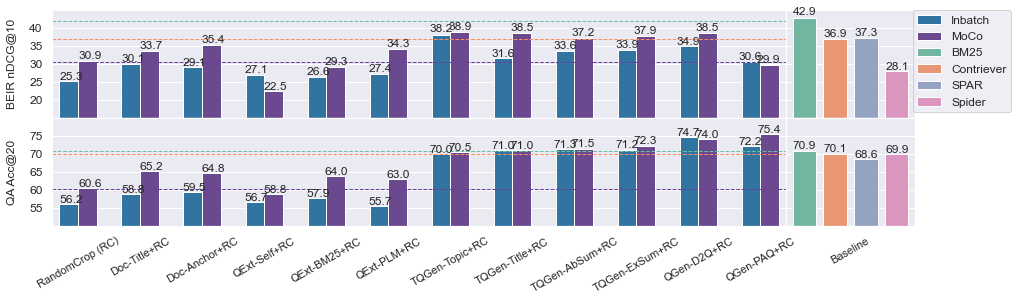

In [6]:
beir_df = pd.read_csv('beir_score.csv')
# print(df.to_string())
df = beir_df[~beir_df['group'].isnull()]
print(len(df))
print(df.columns)

# sns.color_palette("Set2")
# sns.color_palette("Paired")
hls_colors = sns.color_palette("hls", 8)
husl_colors = sns.color_palette("husl", 8)
paired_colors = sns.color_palette("Paired").as_hex()
set_colors = sns.color_palette("Set2").as_hex()

sns.set(rc={'figure.figsize': (10, 8), 'axes.labelsize': 12, 'ytick.labelsize': 12, 'axes.labelpad': 12, 'legend.fontsize': 12})
fig, axes = plt.subplots(2, 2, figsize=(12, 6), width_ratios=[4, 0.7])

# ============
# BEIR
# ============
our_ax = axes[0][0]
baseline_ax = axes[0][1]
# plot baselines
df_baseline = df[df['group'] == 'Baseline']
our_plot = sns.barplot(x='aug', y="Avg-14 (public)", hue="arch", data=df_baseline, ax=baseline_ax, palette=set_colors)
# plot ours
df_RC = df[(df['short-exp-name'].str.endswith('+RC')) & (df['group'].str.strip() != 'Baseline')]
baseline_plot = sns.barplot(x='aug', y="Avg-14 (public)", hue="arch", data=df_RC, ax=our_ax, palette=[paired_colors[1], paired_colors[9]], width=0.6)

# adjust bar width and margin
width_changer(our_ax, .3)
width_changer(baseline_ax, .15)
our_ax.margins(x=0.01)  # left/right margin to border
baseline_ax.margins(x=0.02)  # left/right margin to border

# axes[0].set_xlim(0, 3)
# axes[1].set_xlim(0, 3)

our_plot.set(xticklabels=[])
our_plot.set(xlabel=None)
baseline_plot.set(xticklabels=[])
baseline_plot.set(xlabel=None)

# plt.setp(axes[0].get_xticklabels(), rotation=45, ha='center')
# plt.setp(axes[1].get_xticklabels(), rotation=45, ha='center')

# add labels
for p in our_ax.patches:
    our_ax.annotate('%.1f' % (p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.015))
for p in baseline_ax.patches:
    baseline_ax.annotate('%.1f' % (p.get_height()), (p.get_x() * 1.004, p.get_height() * 1.015), size=12)

our_ax.set(ylim=(15, 45))
baseline_ax.set(ylim=(15, 45))
our_ax.set_yticks(np.arange(20, 45, 5))
baseline_ax.set_yticks(np.arange(20, 45, 5))

our_ax.set_ylabel("BEIR nDCG@10")
our_ax.set_xlabel("")
baseline_ax.set_xlabel("")
baseline_ax.set_ylabel("")
baseline_ax.set(ylabel=None)
baseline_ax.set(yticklabels=[])

our_ax.axhline(y=42.0, c=set_colors[0], linestyle='dashed', label="BM25", linewidth=1)
our_ax.axhline(y=36.9, c=set_colors[1], linestyle='dashed', label="Contriever", linewidth=1)
our_ax.axhline(y=30.5, c=paired_colors[9], linestyle='dashed', label="Our Contriever", linewidth=1)
our_ax.legend([],[], frameon=False)
baseline_ax.legend([],[], frameon=False)
# ============
# QA
# ============
qa_df = pd.read_csv('qa_score.csv')
df = qa_df[~qa_df['group'].isnull()]

our_ax = axes[1][0]
baseline_ax = axes[1][1]
# plot baselines
df_baseline = df[df['group'] == 'Baseline']
plot = sns.barplot(x='aug', y="AVG-R@20", hue="arch", data=df_baseline, ax=baseline_ax, palette=set_colors)
# # plot ours
df_RC = df[(df['short-exp-name'].str.endswith('+RC')) & (df['group'].str.strip() != 'Baseline')]
plot = sns.barplot(x='aug', y="AVG-R@20", hue="arch", data=df_RC, ax=our_ax, palette=[paired_colors[1], paired_colors[9]], width=0.6)

# adjust bar width and margin
width_changer(baseline_ax, .15)
width_changer(our_ax, .3)
our_ax.margins(x=0.01)  # left/right margin to border
baseline_ax.margins(x=0.02)  # left/right margin to border

plt.setp(our_ax.get_xticklabels(), rotation=30, ha='center')
plt.setp(baseline_ax.get_xticklabels(), rotation=30, ha='center')

# add labels
for p in our_ax.patches:
    our_ax.annotate('%.1f' % (p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.005))
for p in baseline_ax.patches:
    baseline_ax.annotate('%.1f' % (p.get_height()), (p.get_x() * 1.004, p.get_height() * 1.005), size=12)

our_ax.set(ylim=(50, 80))
baseline_ax.set(ylim=(50, 80))
our_ax.set_yticks(np.arange(55, 80, 5))
baseline_ax.set_yticks(np.arange(55, 80, 5))

our_ax.set_ylabel("QA Acc@20")
our_ax.set_xlabel("")
baseline_ax.set_xlabel("")
baseline_ax.set_ylabel("")
baseline_ax.set(ylabel=None)
baseline_ax.set(yticklabels=[])

our_ax.axhline(y=70.9, c=set_colors[0], linestyle='dashed', label="BM25", linewidth=1)
our_ax.axhline(y=70.1, c=set_colors[1], linestyle='dashed', label="Contriever", linewidth=1)
our_ax.axhline(y=60.3, c=paired_colors[9], linestyle='dashed', label="Our Contriever", linewidth=1)

# legend
our_ax.legend([],[], frameon=False)
baseline_ax.legend([],[], frameon=False)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, bbox_to_anchor=(-0.15, 0.95), loc="upper left", borderaxespad=0.)
fig.legend(lines[12:], labels[12:], bbox_to_anchor=(1.11, 1.0), loc="upper right", borderaxespad=0.)


# plt.legend(handles=handles, labels=labels, loc="upper right")

plt.tight_layout(pad=-0.1)
plt.subplots_adjust(left=0, bottom=0.5, right=None, top=None, wspace=0, hspace=None)
plt.show()

<ipython-input-12-788e5d2574a9>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = df['group'].apply(lambda x: x.replace('(CC)', ''))
<ipython-input-12-788e5d2574a9>:75: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  pad = max(T.label.get_window_extent().width for T in yax.majorTicks)


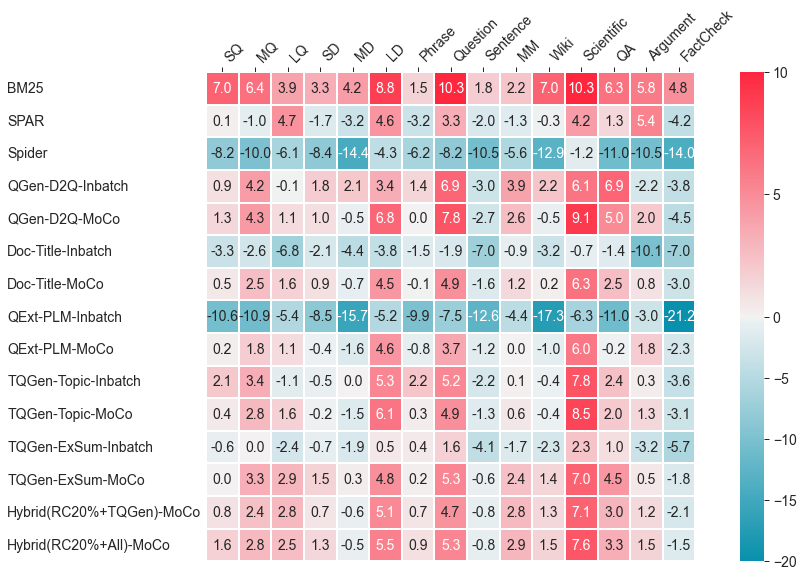

In [12]:
exp_groups = ['Baseline', 'QGen-D2Q(CC)',
              # 'QGen-D2Q(Wiki)', 'TQGen-Topic(Wiki)',
              'Doc-Title(CC)', 'QExt-PLM(CC)', 'TQGen-Topic(CC)', 'TQGen-ExSum(CC)', 'Hybrid(RC20%+TQGen)', 'Hybrid(RC20%+All)']

col_black_list = ['xSD-1-diff', 'Avg-11 (CPT)-diff', 'Avg-13 (Aggretriever)-diff', 'Avg-14 (public)-diff', 'Avg-14+MM-diff',
              'NonWiki-9-diff', 'Biomedical-2-diff', 'Entity-1-diff']
beir_df = pd.read_csv('beir_group_heatmap.csv')
# print(df.to_string())
df = beir_df[~beir_df['group'].isnull() & ~beir_df['arch'].isnull()]
# print(len(df))
# print(df.columns)


# df_RC = df[(df['short-exp-name'].str.endswith('+RC')) & (df['group'].str.strip() != 'Baseline')]
# print(df['arch'].unique())
# print(len(df[(df['arch'].str.strip() == 'Inbatch') & (df['group'].isin(groups))]))
# display(df[(df['arch'].str.strip() == 'Inbatch') & (df['group'].isin(groups))])

baseline_df = df[(df['group'].str.strip() == 'Baseline')]
inbatch_df = df[(df['arch'].str.strip() == 'Inbatch') & (df['group'].isin(exp_groups))  & (~df['aug'].str.endswith('+RC', na=False))]
moco_df = df[(df['arch'].str.strip() == 'MoCo') & (df['group'].isin(exp_groups)) & (df['aug'].str.endswith('+RC'))]

join_df = pd.concat([baseline_df, inbatch_df, moco_df])
join_df.arch = join_df.arch.astype("category")
join_df.arch = join_df.arch.cat.set_categories(['Inbatch', 'MoCo'])
join_df.group = join_df.group.astype("category")
join_df.group = join_df.group.cat.set_categories(exp_groups)
join_df = join_df.sort_values(["group", "arch"])
# print(len(join_df))
# display(join_df)
df['group'] = df['group'].apply(lambda x: x.replace('(CC)', ''))
join_df['short-exp-name'] = df[['arch', 'group']].apply(lambda x: x[0] if x[1]=='Baseline' else '-'.join([x[1], x[0]]), axis=1)
cols = [c for c in df.columns if c.endswith('-diff') and c not in col_black_list]
# print(cols)
join_df = join_df[['short-exp-name']+cols]
join_df.set_index("short-exp-name", inplace=True)
col_mapping = {c:c[:c.index('-')] for c in cols}
join_df = join_df.rename(columns=col_mapping)
# join_df = join_df.transpose()
# display(join_df)

sns.set_context("paper", rc={"font.size": 14,
                             "axes.titlesize": 14,
                             "axes.labelsize": 14,
                             "xtick.labelsize": 14,
                             "ytick.labelsize": 14,
                             "legend.fontsize": 14})


cmap = sns.diverging_palette(220, 10, s=99, l=55, as_cmap=True)
# cmap = sns.diverging_palette(230, 1, s=100, l=60, as_cmap=True)
# cmap = sns.diverging_palette(255, 0, sep=1, n=256)
# cmap = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)


f, ax = plt.subplots(figsize=(16, 9))
# print(join_df.max())
divnorm = TwoSlopeNorm(vmin=-20, vcenter=0, vmax=10)
hm = sns.heatmap(join_df, square=True, linewidths=.2, ax=ax, cmap=cmap,
            fmt='.1f', cbar=True, annot=True,
            norm=divnorm,
            # vmin=-22, vmax=8,
            # cbar_kws={"shrink": .8}
                 )

ax.set_xlabel("")
ax.set_ylabel("")

# for tick in hm.get_yticklabels():
#     print(tick)
hm.set_yticklabels(hm.get_yticklabels(), ha="left")
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, ha="left")

yax = ax.get_yaxis()
pad = max(T.label.get_window_extent().width for T in yax.majorTicks)
yax.set_tick_params(pad=pad)

ax.xaxis.tick_top()


['msmarco±', 'trec-covid±', 'nfcorpus±', 'nq±', 'hotpotqa±', 'fiqa±', 'arguana±', 'webis-touche2020±', 'dbpedia-entity±', 'scidocs±', 'fever±', 'climate-fever±', 'scifact±', 'quora±', 'cqadupstack±']
{'msmarco±': 'msmarco', 'trec-covid±': 'trec-covid', 'nfcorpus±': 'nfcorpus', 'nq±': 'nq', 'hotpotqa±': 'hotpotqa', 'fiqa±': 'fiqa', 'arguana±': 'arguana', 'webis-touche2020±': 'touche2020', 'dbpedia-entity±': 'dbpedia', 'scidocs±': 'scidocs', 'fever±': 'fever', 'climate-fever±': 'cli-fever', 'scifact±': 'scifact', 'quora±': 'quora', 'cqadupstack±': 'cqadup'}


<ipython-input-11-29078bb3e042>:75: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  pad = max(T.label.get_window_extent().width for T in yax.majorTicks)


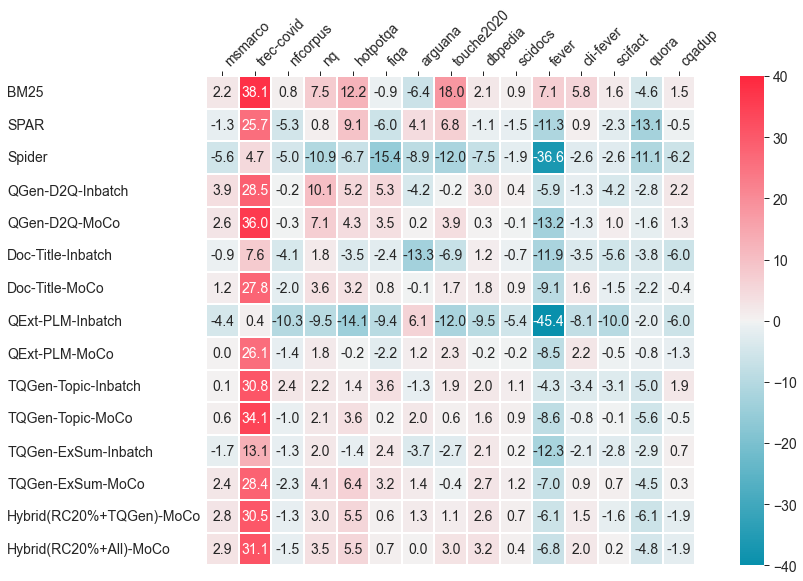

In [11]:
exp_groups = ['Baseline', 'QGen-D2Q(CC)',
              # 'QGen-D2Q(Wiki)', 'TQGen-Topic(Wiki)',
              'Doc-Title(CC)', 'QExt-PLM(CC)', 'TQGen-Topic(CC)', 'TQGen-ExSum(CC)', 'Hybrid(RC20%+TQGen)', 'Hybrid(RC20%+All)']

cols = ['msmarco', 'trec-covid', 'nfcorpus', 'nq', 'hotpotqa', 'fiqa', 'arguana', 'webis-touche2020', 'dbpedia-entity', 'scidocs', 'fever', 'climate-fever', 'scifact', 'quora', 'cqadupstack']
cols = [c for c in cols] # % ±
cols = [c+'±' for c in cols] # % ±
print(cols)

beir_df = pd.read_csv('beir_heatmap.csv')
df = beir_df[~beir_df['group'].isnull() & ~beir_df['arch'].isnull()]
df = df[~df['msmarco'].isnull()]

baseline_df = df[(df['group'].str.strip() == 'Baseline')]
inbatch_df = df[(df['arch'].str.strip() == 'Inbatch') & (df['group'].isin(exp_groups))  & (~df['aug'].str.endswith('+RC', na=False))]
moco_df = df[(df['arch'].str.strip() == 'MoCo') & (df['group'].isin(exp_groups)) & (df['aug'].str.endswith('+RC'))]
# display(moco_df)
# print(moco_df.columns)

# sort rows
join_df = pd.concat([baseline_df, inbatch_df, moco_df])
join_df.group = join_df.group.astype("category")
join_df.group = join_df.group.cat.set_categories(exp_groups)
join_df = join_df.sort_values(["group"])
# display(join_df[cols])

# process value
join_df[cols] = join_df[cols].astype(float)
join_df[cols] = join_df[cols].apply(lambda x: x*100.0)

# add index
df['group'] = df['group'].apply(lambda x: x.replace('(CC)', ''))
join_df['short-exp-name'] = df[['arch', 'group']].apply(lambda x: x[0] if x[1]=='Baseline' else '-'.join([x[1], x[0]]), axis=1)
join_df = join_df[['short-exp-name']+cols]
join_df.set_index("short-exp-name", inplace=True)
# display(join_df)
# print(join_df.dtypes)

# rename cols
col_mappings = {c:c.replace('±', '') for c in cols}
col_mappings.update({'webis-touche2020±': 'touche2020', 'dbpedia-entity±': 'dbpedia', 'climate-fever±': 'cli-fever', 'cqadupstack±': 'cqadup'})
print(col_mappings)
join_df.rename(columns=col_mappings, inplace=True)

sns.set_context("paper", rc={"font.size": 14,
                             "axes.titlesize": 14,
                             "axes.labelsize": 14,
                             "xtick.labelsize": 14,
                             "ytick.labelsize": 14,
                             "legend.fontsize": 14})

cmap = sns.diverging_palette(220, 10, s=99, l=55, as_cmap=True)
# cmap = sns.diverging_palette(230, 1, s=100, l=60, as_cmap=True)
# cmap = sns.diverging_palette(255, 0, sep=1, n=256)
# cmap = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)

f, ax = plt.subplots(figsize=(16, 9))

norm = None
df_max, df_min = join_df.to_numpy().max(), join_df.to_numpy().max()
divnorm = TwoSlopeNorm(vmin=-40, vcenter=0, vmax=40)
hm = sns.heatmap(join_df, square=True, linewidths=.2, ax=ax, cmap=cmap,
            fmt='.1f', cbar=True, annot=True,
            norm=divnorm,
            # vmin=-22, vmax=8,
            # cbar_kws={"shrink": .8}
            )

ax.set_xlabel("")
ax.set_ylabel("")
hm.set_yticklabels(hm.get_yticklabels(), ha="left")
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, ha="left")

yax = ax.get_yaxis()
pad = max(T.label.get_window_extent().width for T in yax.majorTicks)
yax.set_tick_params(pad=pad)

ax.xaxis.tick_top()


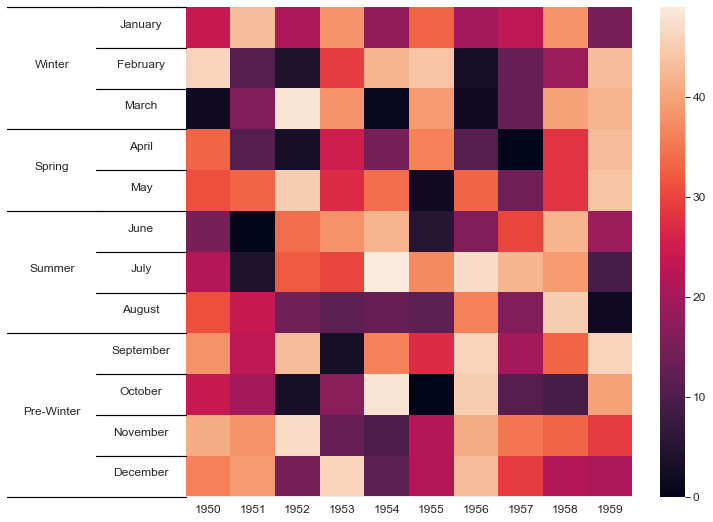

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import groupby
import datetime
import seaborn as sns

def test_table():
    months = [datetime.date(2008, i+1, 1).strftime('%B') for i in range(12)]
    seasons = ['Winter',]*3 + ['Spring',]*2 + ['Summer']*3 + ['Pre-Winter',]*4
    tuples = list(zip(months, seasons))
    index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
    d = {i: [np.random.randint(0,50) for _ in range(12)] for i in range(1950, 1960)}
    df = pd.DataFrame(d, index=index)
    return df

def add_line(ax, xpos, ypos):
    line = plt.Line2D([ypos, ypos+ .2], [xpos, xpos], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    xpos = -.2
    scale = 1./df.index.size
    for level in range(df.index.nlevels):
        pos = df.index.size
        for label, rpos in label_len(df.index,level):
            add_line(ax, pos*scale, xpos)
            pos -= rpos
            lypos = (pos + .5 * rpos)*scale
            ax.text(xpos+.1, lypos, label, ha='center', transform=ax.transAxes)
        add_line(ax, pos*scale , xpos)
        xpos -= .2

df = test_table()

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
sns.heatmap(df)

#Below 3 lines remove default labels
labels = ['' for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.set_ylabel('')

label_group_bar_table(ax, df)
fig.subplots_adjust(bottom=.1*df.index.nlevels)
plt.show()

In [66]:

metric_names = ['absent_exact_recall@50']

datasets = valid_one2seq_df.test_dataset.unique()
orders = valid_one2seq_df.order.unique()
bar_values = {'%s - %s' % (order, metric_name): [] for order in orders for metric_name in metric_names}
for index_label, row_series in valid_one2seq_df.iterrows():
    for metric_name in metric_names:
        bar_value = row_series[metric_name]
        bar_values['%s - %s' % (row_series.order, metric_name)].append(float(bar_value))

kp20k_valid2k_idx = datasets.tolist().index('kp20k_valid2k')
for k, v in bar_values.items():
    _v = [e for i,e in enumerate(v) if i != kp20k_valid2k_idx]
    bar_values[k].append(np.mean(_v))

datasets = np.append(datasets, 'Average')
df = pd.DataFrame(bar_values, index=datasets)

df_f1_50 = copy.copy(df)
df_f1_50 = df_f1_50.drop(['kp20k_valid2k'], axis=0)
print(df_f1_50.shape)
column_name_map = {
    'random - absent_exact_recall@50': "random",
    'alphabetical - absent_exact_recall@50': "alpha",
    'alphabetical_reverse - absent_exact_recall@50': "alpha-reverse",
    'length - absent_exact_recall@50': "length",
    'length_reverse - absent_exact_recall@50': "length-reverse",
    'no_sort - absent_exact_recall@50': "no-sort",
    'no_sort_reverse - absent_exact_recall@50': "no-sort-reverse",
    'verbatim_append - absent_exact_recall@50': "pres-abs",
    'verbatim_prepend - absent_exact_recall@50': "abs-pres"
}

normalized_df_f1_50 = df_f1_50.div(df_f1_50.sum(axis=1), axis=0)
print(normalized_df_f1_50.columns)
normalized_df_f1_50.columns = [column_name_map[item] for item in normalized_df_f1_50.columns]


sns.set_context("paper", rc={"font.size": 18,
                             "axes.titlesize": 18,
                             "axes.labelsize": 18,
                             "xtick.labelsize": 18,
                             "ytick.labelsize": 18,
                             "legend.fontsize": 12})


cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, axes = plt.subplots(figsize=(12, 8))
sns.heatmap(normalized_df_f1_50, annot=df_f1_50, linewidths=.2, ax=axes, cmap=cmap, fmt='.3f', cbar=False)


NameError: name 'valid_one2seq_df' is not defined

### Plot wiki models on BEIR

52
Index(['group', 'aug', 'arch', 'short-exp-name', 'exp-name', 'metric',
       'msmarco', 'trec-covid', 'bioasq', 'nfcorpus',
       ...
       'Unnamed: 96', 'Unnamed: 97', 'Unnamed: 98', 'Unnamed: 99',
       'Unnamed: 100', 'Unnamed: 101', 'Unnamed: 102', 'Unnamed: 103',
       'Unnamed: 104', 'Unnamed: 105'],
      dtype='object', length=106)
4
30
48
26


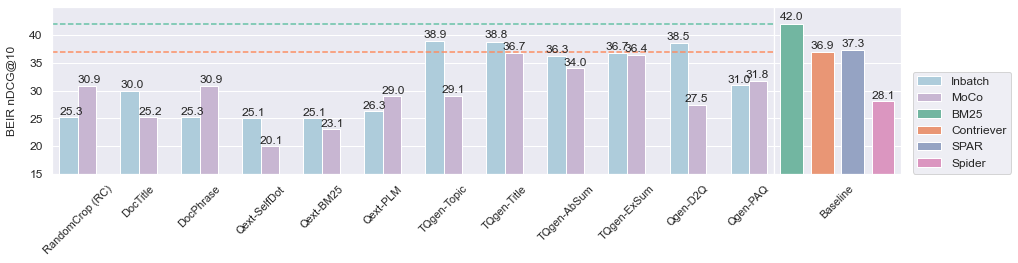

In [268]:
df = pd.read_csv('beir_score.csv')
# print(df.to_string())
df = df[~df['group'].isnull()]
print(len(df))
print(df.columns)

# sns.color_palette("Set2")
# sns.color_palette("Paired")
hls_colors = sns.color_palette("hls", 8)
husl_colors = sns.color_palette("husl", 8)
paired_colors = sns.color_palette("Paired").as_hex()
set_colors = sns.color_palette("Set2").as_hex()

sns.set(rc={'figure.figsize': (10, 4), 'axes.labelsize': 12, 'ytick.labelsize': 12, 'axes.labelpad': 12, 'legend.fontsize': 12})
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True, width_ratios=[4, 0.7])

our_ax = axes[0]
baseline_ax = axes[1]

# plot baselines
df_baseline = df[df['group'] == 'Baseline']
print(len(df_baseline))
plot = sns.barplot(x='aug', y="Avg-14 (public)", hue="arch", data=df_baseline, ax=baseline_ax, palette=set_colors)

# plot ours
print(len(df[~df['short-exp-name'].str.endswith('+RC')]))
print(len(df[df['group'].str.strip() != 'Baseline']))
df_noRC = df[(~df['aug'].str.endswith('+RC')) & (df['group'].str.strip() != 'Baseline')]
print(len(df_noRC))
plot = sns.barplot(x='aug', y="Avg-14 (public)", hue="arch", data=df_noRC, ax=our_ax, palette=[paired_colors[0], paired_colors[8]], width=0.6)

# adjust bar width and margin
width_changer(baseline_ax, .15)
width_changer(our_ax, .3)
our_ax.margins(x=0.01)  # left/right margin to border
baseline_ax.margins(x=0.02)  # left/right margin to border

# axes[0].set_xlim(0, 3)
# axes[1].set_xlim(0, 3)

plt.setp(axes[0].get_xticklabels(), rotation=45, ha='center')
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='center')

# add labels
for p in our_ax.patches:
    our_ax.annotate('%.1f' % (p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.015))
for p in baseline_ax.patches:
    baseline_ax.annotate('%.1f' % (p.get_height()), (p.get_x() * 1.004, p.get_height() * 1.015), size=12)

our_ax.set(ylim=(15, 45))
baseline_ax.set(ylim=(15, 45))
our_ax.set_yticks(np.arange(15, 45, 5))
baseline_ax.set_yticks(np.arange(15, 45, 5))

our_ax.set_xlabel("")
baseline_ax.set_xlabel("")
our_ax.set_ylabel("BEIR nDCG@10")
baseline_ax.set_ylabel("")
baseline_ax.set(ylabel=None)

our_ax.axhline(y=42.0, c=set_colors[0], linestyle='dashed', label="BM25")
our_ax.axhline(y=36.9, c=set_colors[1], linestyle='dashed', label="Contriever")
# our_ax.axhline(y=37.3, c=set_colors[2], linestyle='dashed', label="SPAR")
# plt.axhline(y=28.1, c=hls_colors[6], linestyle='dashed', label="Spider")
# labels = ["BM25", "Contriever", "SPAR", "Spider", "InBatch", "MoCo"]
# handles, _ = plt.get_legend_handles_labels()
our_ax.legend([],[], frameon=False)
baseline_ax.legend([],[], frameon=False)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines[1:], labels[1:], bbox_to_anchor=(-0.15, 0.95), loc="upper left", borderaxespad=0.)
fig.legend(lines[2:], labels[2:], bbox_to_anchor=(1.11, 0.785), loc="upper right", borderaxespad=0.)


# plt.legend(handles=handles, labels=labels, loc="upper right")

plt.tight_layout()
plt.subplots_adjust(left=0, bottom=0.5, right=None, top=None, wspace=0, hspace=None)
plt.show()


### QA, wiki models

52
Index(['group', 'aug', 'arch', 'short-exp-name', 'exp-name', 'NQ-R@1',
       'NQ-R@5', 'NQ-R@10', 'NQ-R@20', 'NQ-R@100',
       ...
       'Unnamed: 96', 'Unnamed: 97', 'Unnamed: 98', 'Unnamed: 99',
       'Unnamed: 100', 'Unnamed: 101', 'Unnamed: 102', 'Unnamed: 103',
       'Unnamed: 104', 'Unnamed: 105'],
      dtype='object', length=106)
4
30
48
26


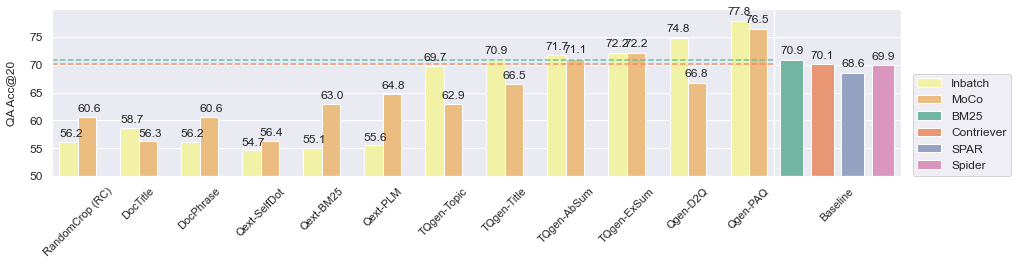

In [280]:
df = pd.read_csv('qa_score.csv')
# print(df.to_string())
df = df[~df['group'].isnull()]
print(len(df))
print(df.columns)

# sns.color_palette("Set2")
# sns.color_palette("Paired")
hls_colors = sns.color_palette("hls", 8)
husl_colors = sns.color_palette("husl", 8)
paired_colors = sns.color_palette("Paired").as_hex()
set_colors = sns.color_palette("Set2").as_hex()

sns.set(rc={'figure.figsize': (10, 4), 'axes.labelsize': 12, 'ytick.labelsize': 12, 'axes.labelpad': 12, 'legend.fontsize': 12})
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True, width_ratios=[4, 0.7])

our_ax = axes[0]
baseline_ax = axes[1]

# plot baselines
df_baseline = df[df['group'] == 'Baseline']
print(len(df_baseline))
plot = sns.barplot(x='aug', y="AVG-R@20", hue="arch", data=df_baseline, ax=baseline_ax, palette=set_colors)

# plot ours
print(len(df[~df['aug'].str.endswith('+RC')]))
print(len(df[df['group'].str.strip() != 'Baseline']))
df_noRC = df[(~df['short-exp-name'].str.endswith('+RC')) & (df['group'].str.strip() != 'Baseline')]
print(len(df_noRC))
plot = sns.barplot(x='aug', y="AVG-R@20", hue="arch", data=df_noRC, ax=our_ax, palette=[paired_colors[10], paired_colors[6]], width=0.6)

# adjust bar width and margin
width_changer(baseline_ax, .15)
width_changer(our_ax, .3)
our_ax.margins(x=0.01)  # left/right margin to border
baseline_ax.margins(x=0.02)  # left/right margin to border

# axes[0].set_xlim(0, 3)
# axes[1].set_xlim(0, 3)

plt.setp(axes[0].get_xticklabels(), rotation=45, ha='center')
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='center')

# add labels
for p in our_ax.patches:
    our_ax.annotate('%.1f' % (p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.015))
for p in baseline_ax.patches:
    baseline_ax.annotate('%.1f' % (p.get_height()), (p.get_x() * 1.004, p.get_height() * 1.015), size=12)

our_ax.set(ylim=(50, 80))
baseline_ax.set(ylim=(50, 80))
our_ax.set_yticks(np.arange(50, 80, 5))
baseline_ax.set_yticks(np.arange(50, 80, 5))

our_ax.set_xlabel("")
baseline_ax.set_xlabel("")
our_ax.set_ylabel("QA Acc@20")
baseline_ax.set_ylabel("")
baseline_ax.set(ylabel=None)

our_ax.axhline(y=70.9, c=set_colors[0], linestyle='dashed', label="BM25")
our_ax.axhline(y=70.1, c=set_colors[1], linestyle='dashed', label="Contriever")
# our_ax.axhline(y=68.6, c=set_colors[2], linestyle='dashed', label="SPAR")
# our_ax.axhline(y=69.9, c=set_colors[3], linestyle='dashed', label="Spider")
# labels = ["BM25", "Contriever", "SPAR", "Spider", "InBatch", "MoCo"]
# handles, _ = plt.get_legend_handles_labels()
our_ax.legend([],[], frameon=False)
baseline_ax.legend([],[], frameon=False)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines[1:], labels[1:], bbox_to_anchor=(-0.15, 0.95), loc="upper left", borderaxespad=0.)
fig.legend(lines[2:], labels[2:], bbox_to_anchor=(1.11, 0.785), loc="upper right", borderaxespad=0.)


# plt.legend(handles=handles, labels=labels, loc="upper right")

plt.tight_layout()
plt.subplots_adjust(left=0, bottom=0.5, right=None, top=None, wspace=0, hspace=None)
plt.show()


### BEIR, wiki models+RC

52
Index(['group', 'aug', 'arch', 'short-exp-name', 'exp-name', 'metric',
       'msmarco', 'trec-covid', 'bioasq', 'nfcorpus',
       ...
       'Unnamed: 96', 'Unnamed: 97', 'Unnamed: 98', 'Unnamed: 99',
       'Unnamed: 100', 'Unnamed: 101', 'Unnamed: 102', 'Unnamed: 103',
       'Unnamed: 104', 'Unnamed: 105'],
      dtype='object', length=106)
4
22
48
26


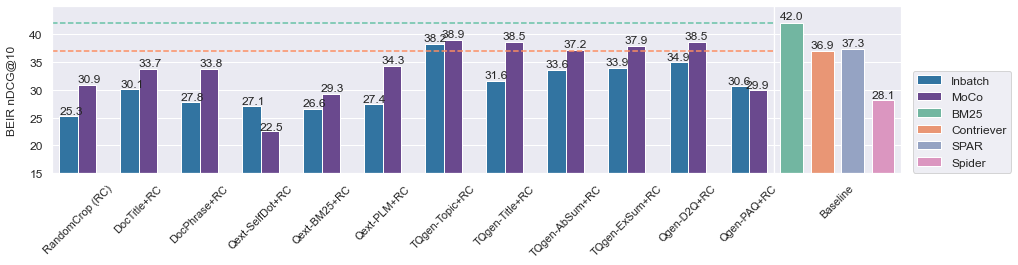

In [267]:
df = pd.read_csv('beir_score.csv')
# print(df.to_string())
df = df[~df['group'].isnull()]
print(len(df))
print(df.columns)

# sns.color_palette("Set2")
# sns.color_palette("Paired")
hls_colors = sns.color_palette("hls", 8)
husl_colors = sns.color_palette("husl", 8)
paired_colors = sns.color_palette("Paired").as_hex()
set_colors = sns.color_palette("Set2").as_hex()

sns.set(rc={'figure.figsize': (10, 4), 'axes.labelsize': 12, 'ytick.labelsize': 12, 'axes.labelpad': 12, 'legend.fontsize': 12})
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True, width_ratios=[4, 0.7])

our_ax = axes[0]
baseline_ax = axes[1]

# plot baselines
df_baseline = df[df['group'] == 'Baseline']
print(len(df_baseline))
plot = sns.barplot(x='aug', y="Avg-14 (public)", hue="arch", data=df_baseline, ax=baseline_ax, palette=set_colors)

# plot ours
print(len(df[df['aug'].str.endswith('+RC')]))
print(len(df[df['group'].str.strip() != 'Baseline']))
df_RC = df[(df['short-exp-name'].str.endswith('+RC')) & (df['group'].str.strip() != 'Baseline')]
print(len(df_RC))
plot = sns.barplot(x='aug', y="Avg-14 (public)", hue="arch", data=df_RC, ax=our_ax, palette=[paired_colors[1], paired_colors[9]], width=0.6)

# adjust bar width and margin
width_changer(baseline_ax, .15)
width_changer(our_ax, .3)
our_ax.margins(x=0.01)  # left/right margin to border
baseline_ax.margins(x=0.02)  # left/right margin to border

# axes[0].set_xlim(0, 3)
# axes[1].set_xlim(0, 3)

plt.setp(axes[0].get_xticklabels(), rotation=45, ha='center')
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='center')

# add labels
for p in our_ax.patches:
    our_ax.annotate('%.1f' % (p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.015))
for p in baseline_ax.patches:
    baseline_ax.annotate('%.1f' % (p.get_height()), (p.get_x() * 1.004, p.get_height() * 1.015), size=12)

our_ax.set(ylim=(15, 45))
baseline_ax.set(ylim=(15, 45))
our_ax.set_yticks(np.arange(15, 45, 5))
baseline_ax.set_yticks(np.arange(15, 45, 5))

our_ax.set_xlabel("")
baseline_ax.set_xlabel("")
our_ax.set_ylabel("BEIR nDCG@10")
baseline_ax.set_ylabel("")
baseline_ax.set(ylabel=None)

our_ax.axhline(y=42.0, c=set_colors[0], linestyle='dashed', label="BM25")
our_ax.axhline(y=36.9, c=set_colors[1], linestyle='dashed', label="Contriever")
# our_ax.axhline(y=37.3, c=set_colors[2], linestyle='dashed', label="SPAR")
# plt.axhline(y=28.1, c=hls_colors[6], linestyle='dashed', label="Spider")
# labels = ["BM25", "Contriever", "SPAR", "Spider", "InBatch", "MoCo"]
# handles, _ = plt.get_legend_handles_labels()
our_ax.legend([],[], frameon=False)
baseline_ax.legend([],[], frameon=False)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines[1:], labels[1:], bbox_to_anchor=(-0.15, 0.95), loc="upper left", borderaxespad=0.)
fig.legend(lines[2:], labels[2:], bbox_to_anchor=(1.11, 0.785), loc="upper right", borderaxespad=0.)


# plt.legend(handles=handles, labels=labels, loc="upper right")

plt.tight_layout()
plt.subplots_adjust(left=0, bottom=0.5, right=None, top=None, wspace=0, hspace=None)
plt.show()


### QA, wiki models+RC

52
Index(['group', 'aug', 'arch', 'short-exp-name', 'exp-name', 'NQ-R@1',
       'NQ-R@5', 'NQ-R@10', 'NQ-R@20', 'NQ-R@100',
       ...
       'Unnamed: 96', 'Unnamed: 97', 'Unnamed: 98', 'Unnamed: 99',
       'Unnamed: 100', 'Unnamed: 101', 'Unnamed: 102', 'Unnamed: 103',
       'Unnamed: 104', 'Unnamed: 105'],
      dtype='object', length=106)
4
22
48
26


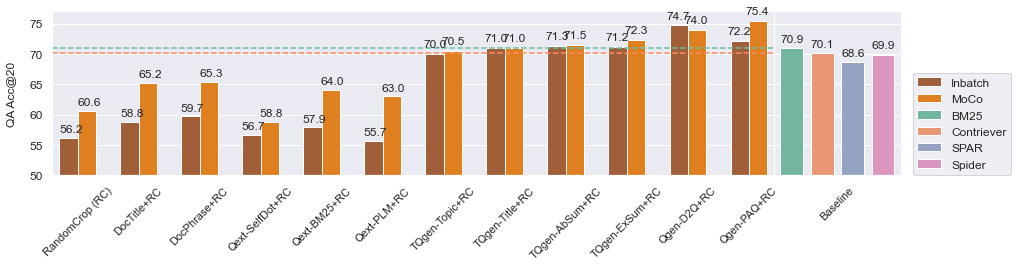

In [262]:
df = pd.read_csv('qa_score.csv')
# print(df.to_string())
df = df[~df['group'].isnull()]
print(len(df))
print(df.columns)

# sns.color_palette("Set2")
# sns.color_palette("Paired")
hls_colors = sns.color_palette("hls", 8)
husl_colors = sns.color_palette("husl", 8)
paired_colors = sns.color_palette("Paired").as_hex()
set_colors = sns.color_palette("Set2").as_hex()

sns.set(rc={'figure.figsize': (10, 4), 'axes.labelsize': 12, 'ytick.labelsize': 12, 'axes.labelpad': 12, 'legend.fontsize': 12})
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True, width_ratios=[4, 0.7])

our_ax = axes[0]
baseline_ax = axes[1]

# plot baselines
df_baseline = df[df['group'] == 'Baseline']
print(len(df_baseline))
plot = sns.barplot(x='aug', y="AVG-R@20", hue="arch", data=df_baseline, ax=baseline_ax, palette=set_colors)

# plot ours
print(len(df[df['aug'].str.endswith('+RC')]))
print(len(df[df['group'].str.strip() != 'Baseline']))
df_RC = df[(df['short-exp-name'].str.endswith('+RC')) & (df['group'].str.strip() != 'Baseline')]
print(len(df_RC))
plot = sns.barplot(x='aug', y="AVG-R@20", hue="arch", data=df_RC, ax=our_ax, palette=[paired_colors[11], paired_colors[7]], width=0.6)

# adjust bar width and margin
width_changer(baseline_ax, .15)
width_changer(our_ax, .3)
our_ax.margins(x=0.01)  # left/right margin to border
baseline_ax.margins(x=0.02)  # left/right margin to border

# axes[0].set_xlim(0, 3)
# axes[1].set_xlim(0, 3)

plt.setp(axes[0].get_xticklabels(), rotation=45, ha='center')
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='center')

# add labels
for p in our_ax.patches:
    our_ax.annotate('%.1f' % (p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.015))
for p in baseline_ax.patches:
    baseline_ax.annotate('%.1f' % (p.get_height()), (p.get_x() * 1.004, p.get_height() * 1.015), size=12)

our_ax.set(ylim=(50, 77))
baseline_ax.set(ylim=(50, 77))
our_ax.set_yticks(np.arange(50, 77, 5))
baseline_ax.set_yticks(np.arange(50, 77, 5))

our_ax.set_xlabel("")
baseline_ax.set_xlabel("")
our_ax.set_ylabel("QA Acc@20")
baseline_ax.set_ylabel("")
baseline_ax.set(ylabel=None)

our_ax.axhline(y=70.9, c=set_colors[0], linestyle='dashed', label="BM25")
our_ax.axhline(y=70.1, c=set_colors[1], linestyle='dashed', label="Contriever")
# our_ax.axhline(y=68.6, c=set_colors[2], linestyle='dashed', label="SPAR")
# our_ax.axhline(y=69.9, c=set_colors[3], linestyle='dashed', label="Spider")
# labels = ["BM25", "Contriever", "SPAR", "Spider", "InBatch", "MoCo"]
# handles, _ = plt.get_legend_handles_labels()
our_ax.legend([],[], frameon=False)
baseline_ax.legend([],[], frameon=False)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines[1:], labels[1:], bbox_to_anchor=(-0.15, 0.95), loc="upper left", borderaxespad=0.)
fig.legend(lines[2:], labels[2:], bbox_to_anchor=(1.11, 0.785), loc="upper right", borderaxespad=0.)


# plt.legend(handles=handles, labels=labels, loc="upper right")

plt.tight_layout()
plt.subplots_adjust(left=0, bottom=0.5, right=None, top=None, wspace=0, hspace=None)
plt.show()


### Other trash

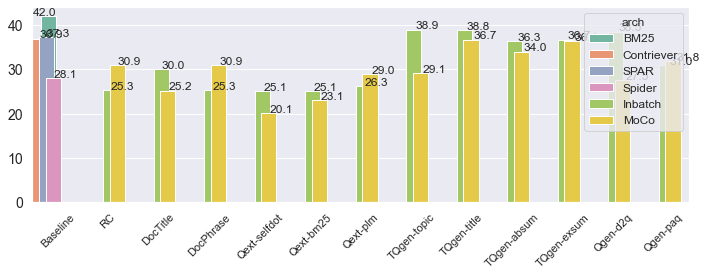

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# sns.color_palette("Set2")
# sns.color_palette("Paired")
hls_colors = sns.color_palette("hls", 8)
colors = sns.color_palette("Set2").as_hex()

df_noRC = df[~df['aug'].str.endswith('+RC')]
sns.set(rc={'figure.figsize': (10, 4), 'axes.labelsize': 14, 'ytick.labelsize': 14, 'axes.labelpad': 14, 'legend.fontsize': 12})
fig, ax1 = plt.subplots()
plot = sns.barplot(x='aug', y="Avg-14 (public)", hue="arch", data=df_noRC, ax=ax1, palette=colors)

width_changer(ax1, .3)


plt.setp(ax1.get_xticklabels(), rotation=45, ha='center')

for p in ax1.patches:
    ax1.annotate('%.1f' % (p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax1.set_xlabel("")
ax1.set_ylabel("")


for i, bar in enumerate(plot.axes.patches):
    # move the missing to the centre
    current_width = bar.get_width()
    current_pos = bar.get_x()
    if i == 0:
        bar.set_x(current_pos+(current_width/2))
    else:
        bar.set_x(current_pos-(current_width/2))

# plt.axhline(y=42.0, c=hls_colors[0], linestyle='dashed', label="BM25")
# plt.axhline(y=36.9, c=hls_colors[1], linestyle='dashed', label="Contriever")
# plt.axhline(y=37.3, c=hls_colors[5], linestyle='dashed', label="SPAR")
# plt.axhline(y=28.1, c=hls_colors[6], linestyle='dashed', label="Spider")
# labels = ["BM25", "Contriever", "InBatch", "MoCo"]
# handles, _ = ax1.get_legend_handles_labels()
# plt.legend(handles=handles, labels = labels)

plt.tight_layout()
plt.show()


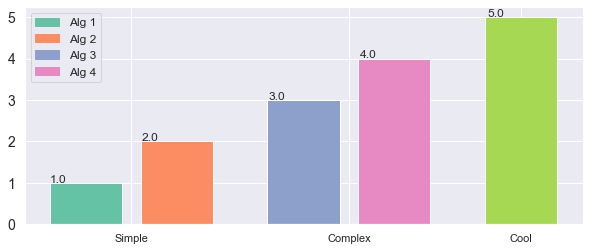

In [223]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

group = ['Simple', 'Simple', 'Complex', 'Complex', 'Cool']
alg = ['Alg 1', 'Alg 2', 'Alg 3', 'Alg 4', 'Alg 2']
# colors = plt.cm.tab10.colors
alg_cat = pd.Categorical(alg)
alg_colors = [colors[c] for c in alg_cat.codes]

results = [i + 1 for i in range(len(group))]

dist_groups = 0.4 # distance between successive groups
pos = (np.array([0] + [g1 != g2 for g1, g2 in zip(group[:-1], group[1:])]) * dist_groups + 1).cumsum()
labels = [g1 for g1, g2 in zip(group[:-1], group[1:]) if g1 != g2] + group[-1:]
label_pos = [sum([p for g, p in zip(group, pos) if g == label]) / len([1 for g in group if g == label])
             for label in labels]
fig, ax2 = plt.subplots()
ax2.bar(pos, results, color=colors)
ax2.set_xticks(label_pos, labels)
handles = [Patch(color=colors[c], label=lab) for c, lab in enumerate(alg_cat.categories)]

for p in ax2.patches:
    ax2.annotate('%.1f' % (p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax2.set_xlabel("")
ax2.set_ylabel("")


plt.legend(handles=handles)
plt.show()

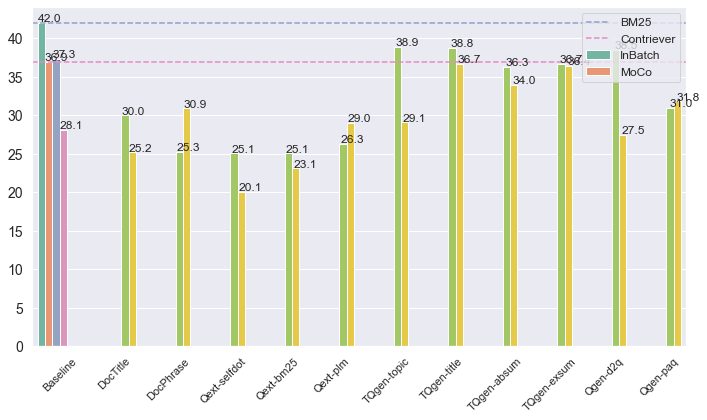

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# sns.color_palette("Set2")
# sns.color_palette("Paired")
colors = sns.color_palette("Set2").as_hex()

df_noRC = df[~df['aug'].str.endswith('RC')]
sns.set(rc={'figure.figsize': (10, 6), 'axes.labelsize': 14, 'ytick.labelsize': 14, 'axes.labelpad': 14, 'legend.fontsize': 12})
fig, ax1 = plt.subplots()
sns.barplot(x='aug', y="Avg-14 (public)", hue="arch", data=df_noRC, ax=ax1, palette=colors)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='center')

for p in ax1.patches:
    ax1.annotate('%.1f' % (p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax1.set_xlabel("")
ax1.set_ylabel("")

# sns.lineplot(x='group', y="BM25", hue="arch", marker='o', data=df_noRC, ax=ax1)
# sns.lineplot(x='group', y="Contriever", hue="arch", marker='.', data=df_noRC, ax=ax1)

plt.axhline(y=42.0, c=colors[2], linestyle='dashed', label="BM25")
plt.axhline(y=36.9, c=colors[3], linestyle='dashed', label="Contriever")
labels = ["BM25", "Contriever", "InBatch", "MoCo"]
handles, _ = ax1.get_legend_handles_labels()
plt.legend(handles=handles, labels = labels)

plt.tight_layout()
plt.show()


<ipython-input-225-d424ebd03cf6>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



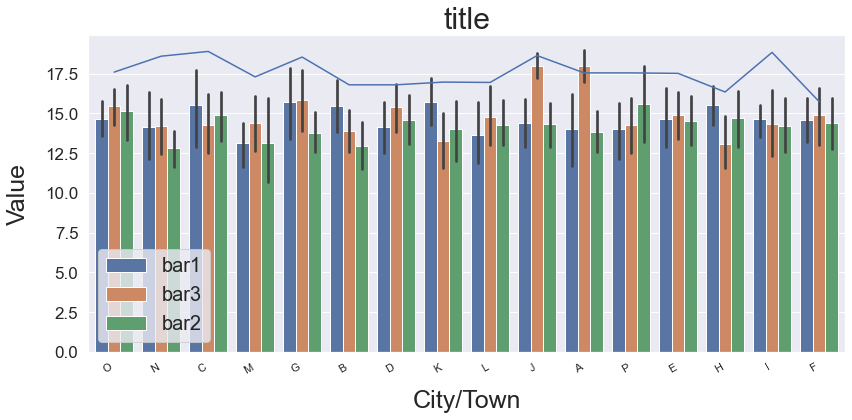

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(123)
df = pd.DataFrame({'City/Town': np.random.choice([*'ABCDEFGHIJKLMNOP'], 500),
                   'Metric': np.random.choice(['bar1', 'bar2', 'bar3'], 500),
                   'Value': np.random.randint(10, 20, 500)})
sns.set(rc={'figure.figsize': (12, 6), 'axes.labelsize': 25, 'ytick.labelsize': 17, 'axes.labelpad': 15,
            'legend.fontsize': 20})
fig, ax1 = plt.subplots()
sns.barplot(x='City/Town', y="Value", hue="Metric", data=df, ax=ax1)
ax1.set_title('title', fontsize=30)
df1 = df[df['Metric'] == 'bar1']
sns.lineplot(x=df1['City/Town'], y=df1["Value"]*1.2, ci=None, ax=ax1)
ax1.margins(x=0.01)
plt.setp(ax1.get_xticklabels(), rotation=30, ha='right')
plt.tight_layout()
plt.show()


In [2]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
